### Udacity Data Science Nanodegree

### Project 3: Disaster Recovery Pipeline
---

# Notebook 1 of 3: # ETL Pipeline Preparation

## by Juanita Smith

---
This notebook explore and clean the messages and categories datasets


#### Table of contents:
- [1. Import libraries and load data from database](#step1)
- [2. Split `categories` into separate category columns](#step2)
- [3. Convert category values to just numbers 0 or 1](#step3)
- [4. Merge datasets](#step4)
- [5. Remove duplicates](#step5)
- [6. Check missing values](#step6)
- [7. Understand the distribution of each class](#step7)
- [8. Understand the distribution of `genre`](#step8)
- [9. Save the clean dataset into a sqlite database](#step9)




<a class="anchor" id=step1></a> 
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">1. Import libraries and load data from database</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from src import config

# environment settings
pd.set_option('display.max_column', 400)
pd.set_option('display.max_colwidth', 400)

In [2]:
# load messages dataset
messages = pd.read_csv(config.path_messages)
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct


In [3]:
# check data types and missing values
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB


In [4]:
# load categories dataset
categories = pd.read_csv(config.path_categories)
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...
1,7,related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-1;floods-0;storm-1;fire-0;ea...
2,8,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...
3,9,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-1;transport-0;buildings-1;electricity-0;tools-0;hospitals-1;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...
4,12,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...


In [5]:
# check data types and missing values
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26248 non-null  int64 
 1   categories  26248 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


<a class="anchor" id='step2'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">2. Split categories </span>

- Split the values in the `categories` column on the `;` character so that each value becomes a separate column.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [6]:
# create a dataframe of the 36 individual category columns
categories = categories['categories'].str.split(';', expand=True).set_index(categories['id'])
categories.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-1,transport-0,buildings-1,electricity-0,tools-0,hospitals-1,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [7]:
# extract a list of new column names for categories.
category_column_names = list(categories.iloc[0,:].str.split('-').str[0])
print(category_column_names)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [8]:
# rename the columns of dataset `categories`
categories.columns = category_column_names
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-1,transport-0,buildings-1,electricity-0,tools-0,hospitals-1,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


<a class="anchor" id='step3'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">3. Convert category values to just numbers 0 or 1</span>

- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.

In [9]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column], downcast='integer')
    
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26248 entries, 2 to 30265
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   related                 26248 non-null  int8 
 1   request                 26248 non-null  int8 
 2   offer                   26248 non-null  int8 
 3   aid_related             26248 non-null  int8 
 4   medical_help            26248 non-null  int8 
 5   medical_products        26248 non-null  int8 
 6   search_and_rescue       26248 non-null  int8 
 7   security                26248 non-null  int8 
 8   military                26248 non-null  int8 
 9   child_alone             26248 non-null  int8 
 10  water                   26248 non-null  int8 
 11  food                    26248 non-null  int8 
 12  shelter                 26248 non-null  int8 
 13  clothing                26248 non-null  int8 
 14  money                   26248 non-null  int8 
 15  missing_people          

<a class="anchor" id=step4></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">4. Merge datasets</span>

- Merge the messages and categories datasets using the common 'id' index
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [11]:
# set id as index also in the messages dataset
messages.set_index('id', inplace=True)
messages.head()

,message,original,genre
id,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct


In [12]:
# merge datasets
df = messages.merge(categories, on='id')
df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a class="anchor" id='step5'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">5. Remove duplicates</span>

- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [13]:
# check number of duplicates
df.duplicated().sum()

171

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [15]:
# check number of duplicates were removed
assert (df.duplicated().sum()) == 0

In [16]:
# check for duplicated 'id'
df.index.duplicated().sum()

36

In [17]:
# display duplicated index records
df[df.index.duplicated(keep=False)][:6]

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202,?? port au prince ?? and food. they need goverment aid and international aid thak you. god bless haiti,"p bay pap la syen ak manje. Yo bezwen ed gouvenman an ak d entenasyonal. Mesi, BonDye beni Ayiti.",direct,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
202,?? port au prince ?? and food. they need goverment aid and international aid thak you. god bless haiti,"p bay pap la syen ak manje. Yo bezwen ed gouvenman an ak d entenasyonal. Mesi, BonDye beni Ayiti.",direct,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,1,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
# drop records with duplicated indexes
df = df[~df.index.duplicated(keep='first')]

In [19]:
assert (df.index.duplicated().sum()) == 0

In [20]:
df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a class="anchor" id='step6'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">6. Check missing values</span>


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26179 entries, 2 to 30265
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   message                 26179 non-null  object
 1   original                10153 non-null  object
 2   genre                   26179 non-null  object
 3   related                 26179 non-null  int8  
 4   request                 26179 non-null  int8  
 5   offer                   26179 non-null  int8  
 6   aid_related             26179 non-null  int8  
 7   medical_help            26179 non-null  int8  
 8   medical_products        26179 non-null  int8  
 9   search_and_rescue       26179 non-null  int8  
 10  security                26179 non-null  int8  
 11  military                26179 non-null  int8  
 12  child_alone             26179 non-null  int8  
 13  water                   26179 non-null  int8  
 14  food                    26179 non-null  int8  
 15  shelter

In [22]:
# drop column 'original' as it contains over 50% missing values and are in foreign language
df.drop('original', inplace=True, axis=1)

In [23]:
# make sure column original no longer exist
assert sum(df.columns == 'original') == 0

<a class="anchor" id='step7'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">7. Understand the distribution of each class</span>

Understand the distribution of each class

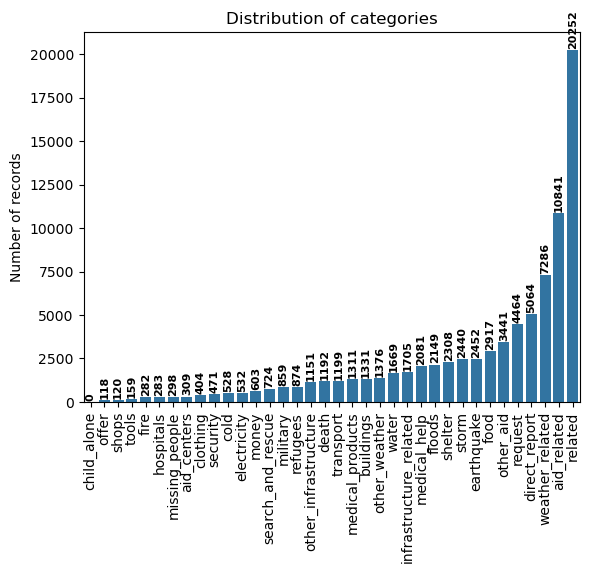

In [24]:
# plot how classes are distributed
df_sum = df.sum(numeric_only=True).sort_values(ascending=True)
ax = sns.barplot(data=df_sum)

# annotate
for c in ax.containers:
    # set the bar label based on the y-axis
    ax.bar_label(c, padding=1, fontsize=8, rotation=90, weight='bold')
        
plt.xticks(rotation=90)

plt.title('Distribution of categories')
plt.ylabel('Number of records')
plt.show()

> 'related' have almost all of its values set to 1, what does this mean ?
> category 'child_alone' have no records set to 1  ?

In [25]:
df.child_alone.value_counts()

child_alone
0    26179
Name: count, dtype: int64

> as category 'child_alone' have no category values == 1, lets drop this category.

In [26]:
df.drop('child_alone', inplace=True, axis=1)

In [27]:
# inspect records where related value is 0
df[df.related == 0].sum(numeric_only=True).sort_values(ascending=True)

related                   0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
infrastructure_related    0
aid_centers               0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_infrastructure      0
other_weather             0
other_aid                 0
refugees                  0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
death                     0
security                  0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
military                  0
direct_report             0
dtype: int64

In [28]:
# inspect messages not related to a disaster
df[df.related == 0][:10]['message']

id
14                                                                    Information about the National Palace-
17                                                           I would like to receive the messages, thank you
21                                               I am in Petionville. I need more information regarding 4636
28                                       are you going to call me or do you want me to call ou? let me know?
30                                                            I don't understand how to use this thing 4636.
37                                                                        Can you tell me about this service
43                                       Good evening, Radio one please. I would like information on Tiyous.
45                                I'm here, I didn't find the person that I needed to send the pant by phone
67    I'm listening to you at Miraguan we asking the government to take change because one gallon gas is 80.
86              

> When related = 0, all categories are also 0. This indicates the message is not related to a disaster

In [29]:
# Understand the distribution of 'related'
df.related.value_counts()

related
1    19876
0     6115
2      188
Name: count, dtype: int64

> We expect only binary values 1 and 0. We have an invalid value = '2'

In [30]:
# inspect unique values of all category columns
df.nunique()

message                   26177
genre                         3
related                       3
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_infrastructure          2
weather_related               2
floods                        2
storm   

In [31]:
for col in df.columns:
    if df[col].dtype == 'O':
        continue
    print(col)
    # set each value to be the last character of the string
    print(df[col].unique())

related
[1 0 2]
request
[0 1]
offer
[0 1]
aid_related
[0 1]
medical_help
[0 1]
medical_products
[0 1]
search_and_rescue
[0 1]
security
[0 1]
military
[0 1]
water
[0 1]
food
[0 1]
shelter
[0 1]
clothing
[0 1]
money
[0 1]
missing_people
[0 1]
refugees
[0 1]
death
[0 1]
other_aid
[0 1]
infrastructure_related
[0 1]
transport
[0 1]
buildings
[0 1]
electricity
[0 1]
tools
[0 1]
hospitals
[0 1]
shops
[0 1]
aid_centers
[0 1]
other_infrastructure
[0 1]
weather_related
[0 1]
floods
[0 1]
storm
[0 1]
fire
[0 1]
earthquake
[0 1]
cold
[0 1]
other_weather
[0 1]
direct_report
[0 1]


In [32]:
# inspect messages with related = 2
df[df.related == 2].sum(numeric_only=True).sort_values(ascending=True)

other_aid                   0
transport                   0
buildings                   0
electricity                 0
tools                       0
hospitals                   0
shops                       0
infrastructure_related      0
aid_centers                 0
weather_related             0
floods                      0
storm                       0
fire                        0
earthquake                  0
cold                        0
other_infrastructure        0
other_weather               0
direct_report               0
refugees                    0
request                     0
offer                       0
aid_related                 0
medical_help                0
medical_products            0
search_and_rescue           0
death                       0
security                    0
water                       0
food                        0
shelter                     0
clothing                    0
money                       0
missing_people              0
military  

> When related = 2, all other columns have value 0. It has the same behaviour as not related and thus should be reset to 0

In [33]:
# inspect messages with related = 2
df[df.related == 2].sample(10)

,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25874,Read the [full blog post](http://www.odi.org.uk/opinion/details.asp?id=6777&title=somalia-horn-africa-humanitarian-crisis-independent-commission-aid-impact-icai-dfid) by Simon Levine.,news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5437,Ede m nan lort pou genyen yon bourss,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9516,"Good evening to all parts of the United Nations so I remsiw Adra, Spain because I see something to bring 250 people found the four towels soap Cink had a six ice all very much pleased the United Nations kounya other things I'm waiting for luggage next to Always on baylode.",direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1951,This is my address : Cersine 8 Prolong. .. .,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13937,"Se o pessoal de SANTA CRUZ for t‚àö¬£o legal AO VIVO, como ‚àö¬© por TWITTER/ORKUT/FOTOLOG, essa sexta vai ser uma das mais legais da hist‚àö‚â•ria!",social,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23358,"crop, loss of hydro-electric generating capacity, a reduction of production in various mining enterprises and",news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17668,"Despite rapid deliveries of tents and other relief assistance by Chinese authorities, fresh snowfall on Tuesday made the situation for the estimated 40,000 homeless people in Zhangbei and Shangyi counties of Hebei Province very difficult.",news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14263,Mera naam Abdul Aziz s/o Abdul karim hai.main dera Allah yaar mein rahta hoon.sailab ki wajah se jo tabahi hue hai.iss mein mera ghar bhi sailab ki nazar ho gaya hai.sailab ke baad hum besaro samaan pare hain.abhi tak humein kisi kisim ki imdad naheen,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13895,lextriplex avisa a galera do blog que eu to aqui em Santiago tentando falar com eles desde sabado mas nao consigo logar nos coments daqui.,social,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Observation: the messages are sometimes in another language. We would ideally need language detection and translate all to English before we train the model

In [34]:
# can we detect more messages not in English ?
df[df.related == 1]['message'].sample(10)

id
28677                                        More effective use of all the tools developed during the past five years must be made to protect civilians, and an energetic battle must be waged against impunity.
24597    The confirmation of H5N1 avian influenza in poultry in Nigeria is the first reported incidence of the highly pathogenic virus on the African continent and poses a risk to human health and livelihood.
17072                                                                                                                                               A preparedness plan for snow emergencies has been finalized.
153         We live in La plaine, we've sleeping in the streets since tuesday. Our house is destroyed. We are dying of thirst and hunger. we can't take this anymore. we'd like to know when the help is coming.
23453                                                                                             WATER PUMPS - WHO is seeking assistance in sourcing large size 

> The Biggest majority of messages seems to be in English. It seems like it is only messages with 'related' = 2 that has lots of non-english language. For now lets keep such records instead and use the language translator later instead

In [35]:
# change 'related' column values from 2 to 0
df['related'] = df['related'].where(df['related'].isin([0, 1]), other=0)
# df = df[df['related'].isin([0,1])]

In [36]:
assert len(df[df['related'] == 2]) == 0

In [37]:
df['related'].value_counts()

related
1    19876
0     6303
Name: count, dtype: int64

<a class="anchor" id='step8'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">8. Inspect message GENRE distribution</span>

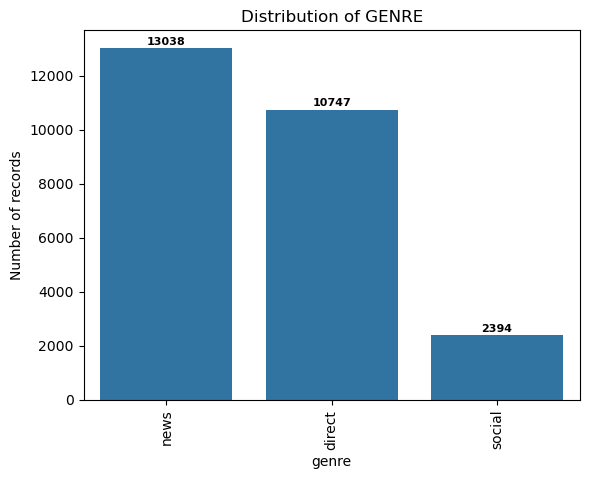

In [38]:
# plot how genre are distributed
# df_sum = df.sum(numeric_only=True).sort_values(ascending=True)
df_cat = df.genre.value_counts()
ax = sns.barplot(data=df_cat)

# annotate
for c in ax.containers:
    # set the bar label based on the y-axis
    ax.bar_label(c, padding=1, fontsize=8, weight='bold')
        
plt.xticks(rotation=90)

plt.title('Distribution of GENRE')
plt.ylabel('Number of records')
plt.show()

In [39]:
df.genre.dtype

dtype('O')

In [40]:
# change GENRE to type 'category'
df["genre"] = df["genre"].astype("category")
assert df["genre"].dtype.name == 'category'

In [41]:
# final look
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26179 entries, 2 to 30265
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   message                 26179 non-null  object  
 1   genre                   26179 non-null  category
 2   related                 26179 non-null  int8    
 3   request                 26179 non-null  int8    
 4   offer                   26179 non-null  int8    
 5   aid_related             26179 non-null  int8    
 6   medical_help            26179 non-null  int8    
 7   medical_products        26179 non-null  int8    
 8   search_and_rescue       26179 non-null  int8    
 9   security                26179 non-null  int8    
 10  military                26179 non-null  int8    
 11  water                   26179 non-null  int8    
 12  food                    26179 non-null  int8    
 13  shelter                 26179 non-null  int8    
 14  clothing                261

<a class="anchor" id='step9'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">9. Save the clean dataset into a sqlite database.</span>

In [42]:
engine = create_engine(config.path_database)
df.to_sql('messages', engine, index=True, if_exists='replace')

26179